In [1]:

####################################################################################################
####################################################################################################

%matplotlib inline


####################################################################################################
####################################################################################################

import sys
import os.path

sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath("../pax"))
sys.path.append(os.path.abspath("../python_pax_reader"))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import waveformset as wfset



##########################################################################################
##########################################################################################

import keras
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
import keras.utils.vis_utils
from keras.utils import plot_model


Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################

file_raw   = "../data_xenon_waveform/FakeWaveform_raw/XENON1T-0-000000000-000000999-000001000.zip"
file_truth = "../data_xenon_waveform/FakeWaveform_truth.csv"


In [3]:

####################################################################################################
####################################################################################################

nEventsGeant = 2

wfs = wfset.WaveformSet()

wfs.read_data_and_truth(file_raw, file_truth, nEventsGeant)



100%|██████████| 1000/1000 [00:03<00:00, 305.62it/s]


Events:    2
PMT Shape: (248,)


In [4]:

##########################################################################################
##########################################################################################

nEvent = 1


In [5]:

##########################################################################################
##########################################################################################

df_truth = wfs.truth()[nEvent]

df_truth = df_truth.loc[df_truth['peak_type'] == 's2']

t0 = df_truth.iloc[0]['t_first_electron']
t1 = df_truth.iloc[0]['t_last_electron']

s0 = int(np.round(t0 / 10))
s1 = int(np.round(t1 / 10))

eps = (s1 - s0)*2.0

x0 = s0 - eps
x1 = s1 + eps

print(s0)
print(s1)


105371
105634


In [6]:

##########################################################################################
##########################################################################################

sum_waveforms = wfs.waveforms_in_channels[nEvent].drop("event_number", axis=1).iloc[:, 0:127].sum(axis=1).as_matrix()

print(sum_waveforms.shape)


(350000,)


In [27]:

##########################################################################################
##########################################################################################

df_pmts = wfs.get_waveforms_in_channels(1)

s2_sum_max = 0
s2_sum_idx = -1

for i in range(0, 127):

    col = "channel_" + str(i)
    
    arr_pmt = df_pmts[:][col].as_matrix()

    s2_sum = np.sum(arr_pmt[s0:s1])
    
    if (s2_sum > s2_sum_max):
        
        s2_sum_max = s2_sum
        s2_sum_idx = i
        
    #print("PMT " + str(i) + ": " + str(s2_sum) )
    
    continue
    
print(s2_sum_max)
print(s2_sum_idx)

df_pmt_max = df_pmts.iloc[:, 94]

#np.sum(df_pmt_max[s0:s1][:])

df_pmt_max.shape

4207843.0
94


(350000,)

In [83]:

df_pmts = wfs.get_waveforms_in_channels(1)


##########################################################################################
##########################################################################################


arr_s2_sum = np.zeros(0)
arr_s2_idx = np.zeros(0)

for i in range(0, 127):

    col = "channel_" + str(i)
    
    arr_pmt = df_pmts[:][col].as_matrix()

    s2_sum = np.sum(arr_pmt[s0:s1])

    arr_s2_sum = np.append(arr_s2_sum, s2_sum)
    arr_s2_idx = np.append(arr_s2_idx, int(i))

    continue
    
    
##########################################################################################
##########################################################################################

df_s2_sum = pd.DataFrame(data={'s2_sum': arr_s2_sum, 'pmt': arr_s2_idx})
df_s2_sum = df_s2_sum.sort_values(['s2_sum'], ascending=False)
df_s2_sum = df_s2_sum.reset_index(drop=True)




(104845.0, 106160.0)

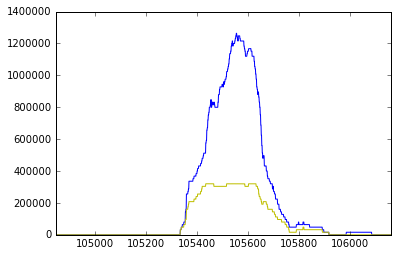

In [106]:

##########################################################################################
##########################################################################################

nMax = 20

arr_s2_sum_select = np.zeros(sum_waveforms.size)

s2_idxs = df_s2_sum.iloc[0:nMax, 0:1].as_matrix().reshape(nMax)
#s2_idxs = int(s2_idxs)

for i in range(0, nMax):
    
    idx = int(s2_idxs[i])
    
    col = "channel_" + str(idx)
    
    #print(col)
    
    arr_pmt = df_pmts[:][col].as_matrix()

    #print(np.max(arr_pmt))
    
    arr_s2_sum_select = np.add(arr_s2_sum_select, arr_pmt)
    
    continue

    
##########################################################################################
##########################################################################################

plt.plot(sum_waveforms    , color='b')
plt.plot(arr_s2_sum_select, color='y')

plt.xlim([x0, x1])


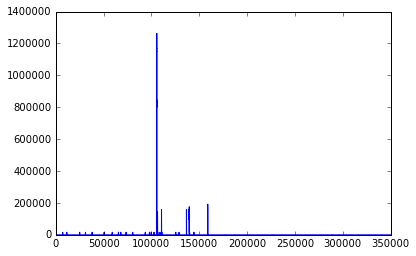

In [54]:

##########################################################################################
##########################################################################################

sum_test = np.zeros(sum_waveforms.size)

for i in range(0, 127):

    col = "channel_" + str(i)
    
    arr_pmt = df_pmts[:][col].as_matrix()
    
    #print(arr_pmt.shape)
    
    sum_test = np.add(sum_test, arr_pmt)
    
plt.plot(sum_test)



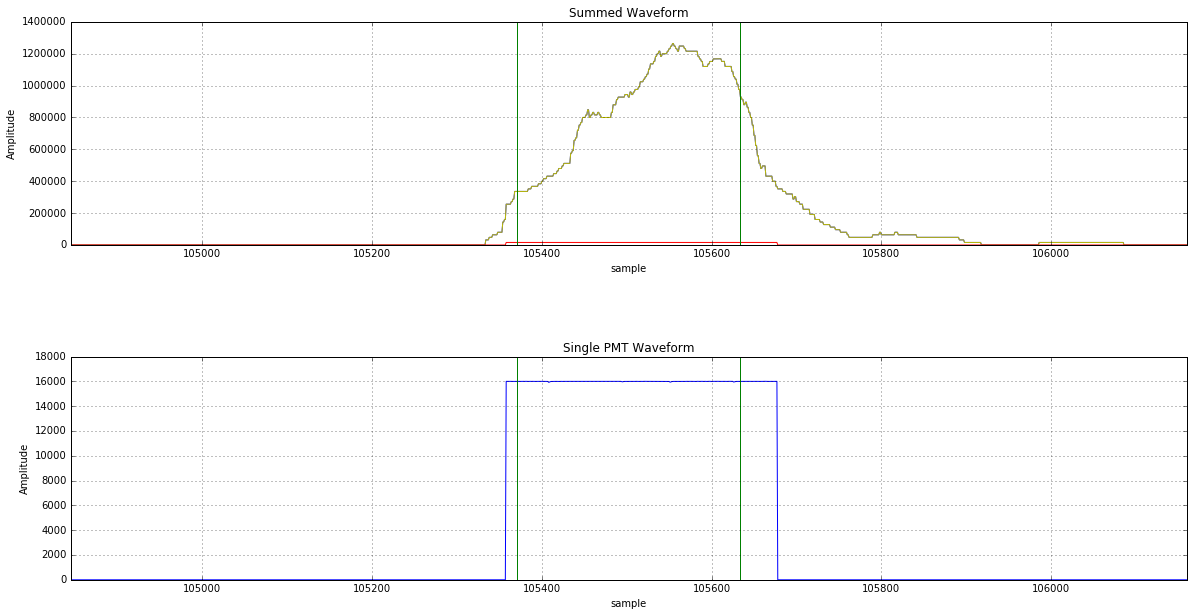

In [26]:

##########################################################################################
##########################################################################################

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

ax1 = plt.subplot(2, 1, 1)
plt.xlim([x0, x1])
plt.plot(sum_waveforms, color='b')
plt.plot(sum_test     , color='y')

plt.plot(df_pmt_max.as_matrix(), color='r')
plt.axvline(x=s0, color='g')
plt.axvline(x=s1, color='g')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Summed Waveform')
plt.grid(True)
y0, y1 = ax1.get_ylim()

plt.subplot(2, 1, 2)
plt.xlim([x0, x1])
#plt.ylim([y0, y1])
plt.plot(df_pmt_max.as_matrix())
plt.axvline(x=s0, color='g')
plt.axvline(x=s1, color='g')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Single PMT Waveform')
plt.grid(True)



In [ ]:

##########################################################################################
##########################################################################################

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

plt.subplot(2, 1, 1)
plt.plot(sum_waveforms)
plt.axvline(x=s0, color='r')
plt.axvline(x=s1, color='r')

plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Summed Waveform')
plt.grid(True)

plt.subplot(2, 1, 2)
#plt.plot(sum_waveforms)
plt.axvline(x=s0, color='r')
plt.axvline(x=s1, color='r')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Single PMT Waveform')
plt.grid(True)


In [ ]:

####################################################################################################
####################################################################################################


##########################################################################################
# Plot light fraction as a function of PMT
##########################################################################################

print(df_train_input.shape)

arr_sums = np.zeros(0)
arr_idxs = np.zeros(0)

for i in range(0, df_train_input.shape[0]):
    
        df = df_train_input[i:i+1][:]
        
        df_sum = np.sum(df.as_matrix())
        
        arr_sums = np.append(arr_sums, df_sum)
        arr_idxs = np.append(arr_idxs, i)
        
        
        
arr_sums = np.sort(arr_sums)[::-1]

#print(arr_sums)

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:


####################################################################################################
# Create the data
####################################################################################################

x = df_train_input[0:10][:].as_matrix()
x = y.reshape(y.size)

g2 = np.tile(list("ABCDEFGHIJ"), 249)
df2 = pd.DataFrame(dict(x=x, g=g2))


####################################################################################################
# Initialize the FacetGrid object
####################################################################################################

pal2 = sns.cubehelix_palette(249, rot=-.25, light=.7)
#g2 = sns.FacetGrid(df2, row="g", hue="g", aspect=15, size=.5, palette=pal2)
g2 = sns.FacetGrid(df2, row="g", hue="g", aspect=10, palette=pal2)


####################################################################################################
# Draw the densities in a few steps
####################################################################################################

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g2.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g2.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g2.map(plt.axhline, y=0, lw=2, clip_on=False)


####################################################################################################
# Define and use a simple function to label the plot in axes coordinates
####################################################################################################

def label(x, color, label):
    
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

#g.map(label, "x")


####################################################################################################
####################################################################################################

g2.fig.subplots_adjust(hspace=-.25) # Set the subplots to overlap
g2.set_titles("")                   # Remove axes details that don't play will with overlap
g2.set(yticks=[])
g2.despine(bottom=True, left=True)
